 # 1.1 Projeto 9 

# 1.2 Importando bibliotecas 

In [109]:
import pandas as pd 
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns 

# 1.3 Pré análise dos dados

In [110]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

In [111]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Hypothesis;Reach;Impact;Confidence;Effort  9 non-null      object
dtypes: object(1)
memory usage: 200.0+ bytes


In [112]:
orders.info()

duplicated = orders.duplicated().sum()

print(duplicated)
print(orders.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
0
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


In [113]:
orders = orders.rename(columns={
    'transactionId': 'transaction_id',        
    'visitorId': 'visitor_id',  
})

Não há valores nulos e nem valores duplicados mas aparentemente algo estranho com as colunas date e group 

In [114]:
orders['date'] = pd.to_datetime(orders['date']) # convertendo para timestamp
orders['group'] = orders['group'].astype('category') # convertendo para category
print(orders)
orders.info() # verificando conversão

      transaction_id  visitor_id       date  revenue group
0         3667963787  3312258926 2019-08-15     30.4     B
1         2804400009  3642806036 2019-08-15     15.2     B
2         2961555356  4069496402 2019-08-15     10.2     A
3         3797467345  1196621759 2019-08-15    155.1     B
4         2282983706  2322279887 2019-08-15     40.5     B
...              ...         ...        ...      ...   ...
1192      2662137336  3733762160 2019-08-14    100.8     B
1193      2203539145   370388673 2019-08-14     50.1     A
1194      1807773912   573423106 2019-08-14    165.3     A
1195      1947021204  1614305549 2019-08-14      5.5     A
1196      3936777065  2108080724 2019-08-15   3120.1     B

[1197 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   

In [115]:
duplicated = orders.duplicated().sum() # checando se algo mudou

print(duplicated)

0


In [116]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [117]:
visits['date'] = pd.to_datetime(visits['date']) # convertendo para timestamp
visits['group'] = visits['group'].astype('category') # convertendo para category
print(visits)
visits.info() # verificando conversão

         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756
..        ...   ...     ...
57 2019-08-27     B     720
58 2019-08-28     B     654
59 2019-08-29     B     531
60 2019-08-30     B     490
61 2019-08-31     B     718

[62 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     category      
 2   visits  62 non-null     int64         
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 1.3 KB


In [118]:
duplicated = visits.duplicated().sum()

print(duplicated)
print(visits.isnull().sum())
print(visits.head(5))

0
date      0
group     0
visits    0
dtype: int64
        date group  visits
0 2019-08-01     A     719
1 2019-08-02     A     619
2 2019-08-03     A     507
3 2019-08-04     A     717
4 2019-08-05     A     756


 Não há presença de valores nulos ou duplicados e os dados foram convertidos para o tipo correto.

In [119]:
# Agrupando por 'visitor_id' para contar o número de grupos únicos
visitantes_grupos_orders = orders.groupby('visitor_id')['group'].nunique()

# Filtrando os visitantes que estão em mais de um grupo (ou seja, número de grupos > 1)
visitantes_em_ambos_os_grupos_orders = visitantes_grupos_orders[visitantes_grupos_orders > 1]

# Exibindo a quantidade de visitantes duplicados
print("Número de visitantes em ambos os grupos no DataFrame 'orders':", visitantes_em_ambos_os_grupos_orders.count())
print("Visitantes em ambos os grupos:", visitantes_em_ambos_os_grupos_orders)

Número de visitantes em ambos os grupos no DataFrame 'orders': 58
Visitantes em ambos os grupos: visitor_id
8300375       2
199603092     2
232979603     2
237748145     2
276558944     2
351125977     2
393266494     2
457167155     2
471551937     2
477780734     2
818047933     2
963407295     2
1230306981    2
1294878855    2
1316129916    2
1333886533    2
1404934699    2
1602967004    2
1614305549    2
1648269707    2
1668030113    2
1738359350    2
1801183820    2
1959144690    2
2038680547    2
2044997962    2
2378935119    2
2458001652    2
2579882178    2
2587333274    2
2600415354    2
2654030115    2
2686716486    2
2712142231    2
2716752286    2
2780786433    2
2927087541    2
2949041841    2
2954449915    2
3062433592    2
3202540741    2
3234906277    2
3656415546    2
3717692402    2
3766097110    2
3803269165    2
3891541246    2
3941795274    2
3951559397    2
3957174400    2
3963646447    2
3972127743    2
3984495233    2
4069496402    2
4120364173    2
4186807279  

Foram encontrados 58 visitantes em ambos os grupos, preciso analisar qual a melhor maneira de lidar 

In [120]:
duplicatas_transaction = orders['transaction_id'].duplicated().sum()
print("Número de IDs de transação duplicados em 'orders':", duplicatas_transaction)

Número de IDs de transação duplicados em 'orders': 0


In [121]:
receita_invalida = orders[orders['revenue'] <= 0]
print("Número de valores de receita inválidos:", receita_invalida.shape[0])
print(receita_invalida)

Número de valores de receita inválidos: 0
Empty DataFrame
Columns: [transaction_id, visitor_id, date, revenue, group]
Index: []


In [122]:
visitas_invalidas = visits[visits['visits'] <= 0]
print("Número de valores de visitas inválidos:", visitas_invalidas.shape[0])
print(visitas_invalidas)

Número de valores de visitas inválidos: 0
Empty DataFrame
Columns: [date, group, visits]
Index: []


In [123]:
print("Período de datas em 'orders':", orders['date'].min(), "a", orders['date'].max())
print("Período de datas em 'visits':", visits['date'].min(), "a", visits['date'].max())

Período de datas em 'orders': 2019-08-01 00:00:00 a 2019-08-31 00:00:00
Período de datas em 'visits': 2019-08-01 00:00:00 a 2019-08-31 00:00:00


verificando a limpeza dos dados para prosseguir com a análise 

In [124]:
numero_visitantes_antes = orders['visitor_id'].nunique()

print("Número total de visitantes antes de excluir duplicados:", numero_visitantes_antes)

Número total de visitantes antes de excluir duplicados: 1031


In [125]:
visitantes_duplicados = visitantes_em_ambos_os_grupos_orders.index

# Excluindo esses visitantes do DataFrame 'orders'
orders_filtradas = orders[~orders['visitor_id'].isin(visitantes_duplicados)]

# Verificando a quantidade de visitantes após a filtragem
print("Número de visitantes após filtrar duplicados:", orders_filtradas['visitor_id'].nunique())

Número de visitantes após filtrar duplicados: 973


Excluí os visitantes duplicados entre os grupos A e B

# 1.4 Priorizando hipóteses

In [126]:
import pandas as pd

# Lendo o arquivo CSV com o separador correto
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')


#  calculando o ICE
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
print(hypotheses[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


Os resultados do cálculo do ICE (Impacto, Confiança e Esforço) fornecem uma visão clara sobre a priorização de várias hipóteses para ações estratégicas. A hipótese que se destaca com o maior valor de ICE (16,20) é a de lançar uma promoção que oferece descontos aos usuários. Este alto valor indica que essa iniciativa é considerada altamente impactante, com uma boa confiança na sua eficácia e um esforço relativamente baixo para implementação, o que a torna uma prioridade alta.

Na sequência, a proposta de adicionar dois novos canais para atrair tráfego apresenta um valor de ICE de 13,33, também sugerindo que essa estratégia tem um potencial significativo e deve ser considerada com seriedade. Similarmente, a hipótese de adicionar um formulário de assinatura em todas as páginas principais obteve um ICE de 11,20, indicando que essa ação pode ser uma boa oportunidade para aumentar o envolvimento dos usuários e captar leads.

Outras iniciativas, como exibir banners com ofertas atuais e vendas na página principal (ICE de 8,00) e adicionar blocos de recomendações de produtos na loja (ICE de 7,00), ainda são relevantes, mas com um impacto considerado moderado em comparação com as hipóteses anteriores.

Por outro lado, a ideia de lançar um serviço de entrega própria, com um ICE de 2,00, apesar de positiva, sugere que pode exigir um esforço significativo, tornando-se uma opção menos prioritária. A adição de uma página de avaliações de clientes (ICE de 1,33) e a mudança na estrutura de categorias (ICE de 1,13) apresentam valores ainda mais baixos, indicando que, embora sejam boas iniciativas, não têm um impacto suficiente para justificar a atenção imediata.

Finalmente, a proposta de mudar a cor de fundo da página principal possui o menor valor de ICE (1,00), o que a torna a hipótese menos prioritária no contexto geral. Essa análise ressalta a importância de priorizar ações com base em seu potencial impacto e o esforço requerido, ajudando na tomada de decisões estratégicas mais informadas.

In [127]:
import pandas as pd

hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

print(hypotheses)

hypotheses['RICE'] = (hypotheses['Reach']*hypotheses['Impact']*hypotheses['Confidence'])/hypotheses['Effort']
print(hypotheses[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False))



                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   
5  Add a customer review page. This will increase...      3       2   
6  Show banners with current offers and sales on ...      5       3   
7  Add a subscription form to all the main pages....     10       7   
8  Launch a promotion that gives users discounts ...      1       9   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  
5           2       3  
6           8       3  
7           8       5  
8           9       5  
                                          Hypothe

o RICE indica que a hipótese de adicionar um subscripition form às páginas principais deve ter uma alta priorização. Adicionar recomendações de produtos, banners e canais que atraiam tráfegos também podem ser considerados uma boa estratégia, mesmo com um nível médio de significância. As outras opções podem ser importantes mas não urgentes em um contexto amplo.

Ao calcular o ICE, é possível perceber que a priorização de hipótese é focada em lançar uma promoção com disconto para os clientes e em RICE, adicionar formulário de inscrição nas páginas principais. O ICE indica uma visão mais direta e simples, enquanto o RICE é mais detalhado e oferece uma visão mais abrangente de eficácia já que calcula o alcance de quantos usuários ou clientes serão afetados pela iniciativa proposta.

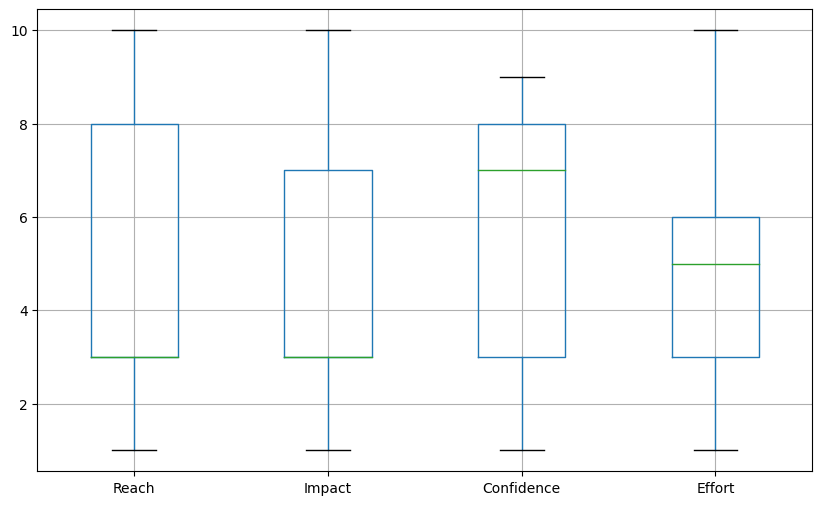

In [128]:
hypotheses[['Reach', 'Impact', 'Confidence', 'Effort']].boxplot(figsize=(10, 6));

# 1.5 Análise de hipóteses

## Cálculo de receita acumulada

         date group  revenue  cumulative_revenue
0  2019-08-01     A   2356.8              2356.8
1  2019-08-01     B   1620.0              1620.0
2  2019-08-02     A   1503.5              3860.3
3  2019-08-02     B   2623.8              4243.8
4  2019-08-03     A   1815.2              5675.5
..        ...   ...      ...                 ...
57 2019-08-29     B   3623.7             87343.0
58 2019-08-30     A   1364.3             63563.5
59 2019-08-30     B   3393.3             90736.3
60 2019-08-31     A    991.4             64554.9
61 2019-08-31     B   2104.3             92840.6

[62 rows x 4 columns]


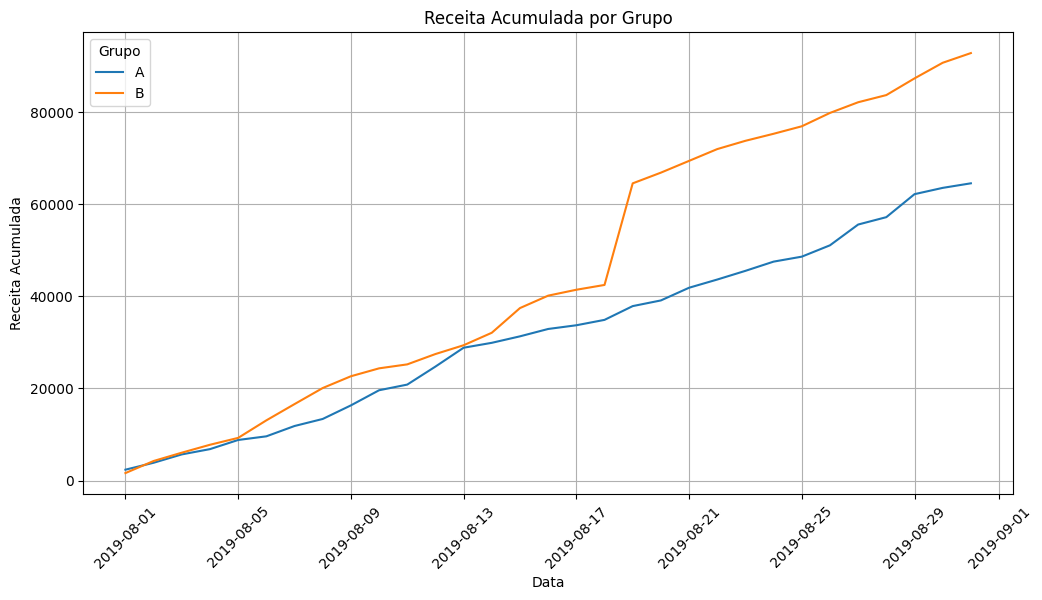

In [129]:
revenue_grouped = orders.groupby(['date', 'group'])['revenue'].sum().reset_index()

# Calculando a receita acumulada
revenue_grouped['cumulative_revenue'] = revenue_grouped.groupby('group')['revenue'].cumsum()

print(revenue_grouped)

plt.figure(figsize=(12, 6))

# Criando o gráfico da receita acumulada
for group in revenue_grouped['group'].unique():
    plt.plot(revenue_grouped[revenue_grouped['group'] == group]['date'],
             revenue_grouped[revenue_grouped['group'] == group]['cumulative_revenue'],
             label=group)

plt.title('Receita Acumulada por Grupo')
plt.xlabel('Data')
plt.ylabel('Receita Acumulada')
plt.legend(title='Grupo')
plt.grid()
plt.xticks(rotation=45)
plt.show()

Com base nos dados apresentados da receita acumulada por grupo durante o teste A/B, podemos fazer algumas interpretações e observações importantes.

No início do período analisado, em 1º de agosto de 2019, o grupo A começou com uma receita acumulada de 2356.8, enquanto o grupo B tinha 1620.0. Isso sugere que o grupo A estava inicialmente mais forte em termos de vendas. No entanto, com o passar dos dias, ambos os grupos mostraram crescimento em suas receitas acumuladas, mas a taxa de crescimento variou. Em 2 de agosto de 2019, o grupo A alcançou uma receita acumulada de 3860.3, enquanto o grupo B subiu para 4243.8. Aqui, podemos observar que o grupo B superou o grupo A em receita acumulada, indicando uma estratégia ou tática mais eficaz.

Ao longo do mês, o grupo B continuou a acumular receitas significativamente mais altas em comparação ao grupo A. No final do período de teste, em 31 de agosto de 2019, o grupo A acumulou 64554.9, enquanto o grupo B atingiu 92840.6. Essa diferença total de receita acumulada é notável e indica que o grupo B teve um desempenho superior, acumulando uma receita consideravelmente maior ao longo do período de teste.

A vantagem do grupo B pode sugerir que a abordagem adotada foi mais bem-sucedida em atrair e converter visitantes em compradores

## Cálculo médio acumulado

  group     revenue
0     A  115.897487
1     B  145.063437


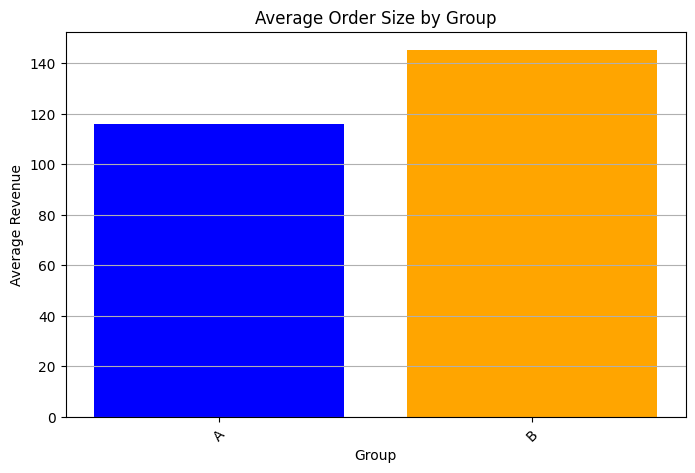

In [130]:
average_order_size = orders.groupby('group')['revenue'].mean().reset_index()
print(average_order_size) 

plt.figure(figsize=(8, 5))
plt.bar(average_order_size['group'], average_order_size['revenue'], color=['blue', 'orange'])
plt.title('Average Order Size by Group')
plt.xlabel('Group')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

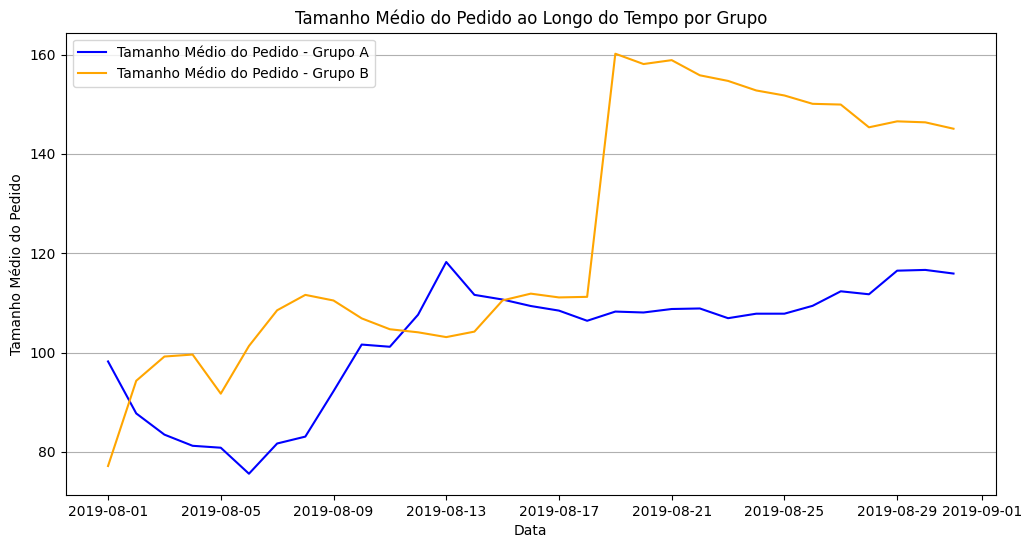

In [131]:
orders['group'] = orders['group'].astype(object)
visits['group'] = visits['group'].astype(object)

# Criar um DataFrame de datas e grupos únicos para calcular os dados acumulados
unique_dates_groups = orders[['date', 'group']].drop_duplicates()

# Agregar dados cumulativos para `orders`
orders_cumulative = unique_dates_groups.apply(
    lambda row: orders[np.logical_and(orders['date'] <= row['date'], orders['group'] == row['group'])].agg({
        'date': 'max',
        'group': 'max',
        'transaction_id': pd.Series.nunique,  # Número cumulativo de transações únicas
        'visitor_id': pd.Series.nunique,      # Número cumulativo de visitantes únicos
        'revenue': 'sum'                      # Receita cumulativa
    }),
    axis=1
).sort_values(by=['date', 'group'])

# Agregar dados cumulativos para `visits`
visits_cumulative = unique_dates_groups.apply(
    lambda row: visits[np.logical_and(visits['date'] <= row['date'], visits['group'] == row['group'])].agg({
        'date': 'max',
        'group': 'max',
        'visits': 'sum'  # Número cumulativo de visitantes
    }),
    axis=1
).sort_values(by=['date', 'group'])

# Juntar dados cumulativos de `orders` e `visits`
cumulative_data = orders_cumulative.merge(visits_cumulative, on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'unique_visitors', 'revenue', 'visits']

# Separar dados por grupo para plotagem
cumulative_revenue_A = cumulative_data[cumulative_data['group'] == 'A'][['date', 'revenue', 'orders']]
cumulative_revenue_B = cumulative_data[cumulative_data['group'] == 'B'][['date', 'revenue', 'orders']]

# Plotar o tamanho médio dos pedidos acumulado para os grupos A e B
plt.figure(figsize=(12, 6))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'] / cumulative_revenue_A['orders'], label='Tamanho Médio do Pedido - Grupo A', color='blue')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'] / cumulative_revenue_B['orders'], label='Tamanho Médio do Pedido - Grupo B', color='orange')
plt.xlabel('Data')
plt.ylabel('Tamanho Médio do Pedido')
plt.title('Tamanho Médio do Pedido ao Longo do Tempo por Grupo')
plt.legend()
plt.grid(axis='y')

plt.show()



O cálculo médio também mostra que o grupo B obteve uma receita maior do que o grupo A, indicando que as estratégias utilizadas no grupo B estão sendo mais eficazes do que as do grupo A.

group                 A            B  relative_difference
date                                                     
2019-08-01    98.200000    77.142857           -21.443119
2019-08-02   173.375000   186.467857             7.551756
2019-08-03   249.008333   299.392857            20.234071
2019-08-04   320.670833   400.410504            24.866518
2019-08-05   400.194833   465.410504            16.295980
2019-08-06   444.072611   601.353361            35.417800
2019-08-07   568.678167   748.499195            31.620878
2019-08-08   664.328167   877.676972            32.114972
2019-08-09   848.521917   980.000972            15.495069
2019-08-10  1054.034417  1054.800972             0.072726
2019-08-11  1148.626724  1121.047126            -2.401093
2019-08-12  1311.576724  1218.686257            -7.082351
2019-08-13  1604.212439  1309.638638           -18.362518
2019-08-14  1648.579105  1427.538638           -13.407938
2019-08-15  1742.459105  1600.503154            -8.146874
2019-08-16  18

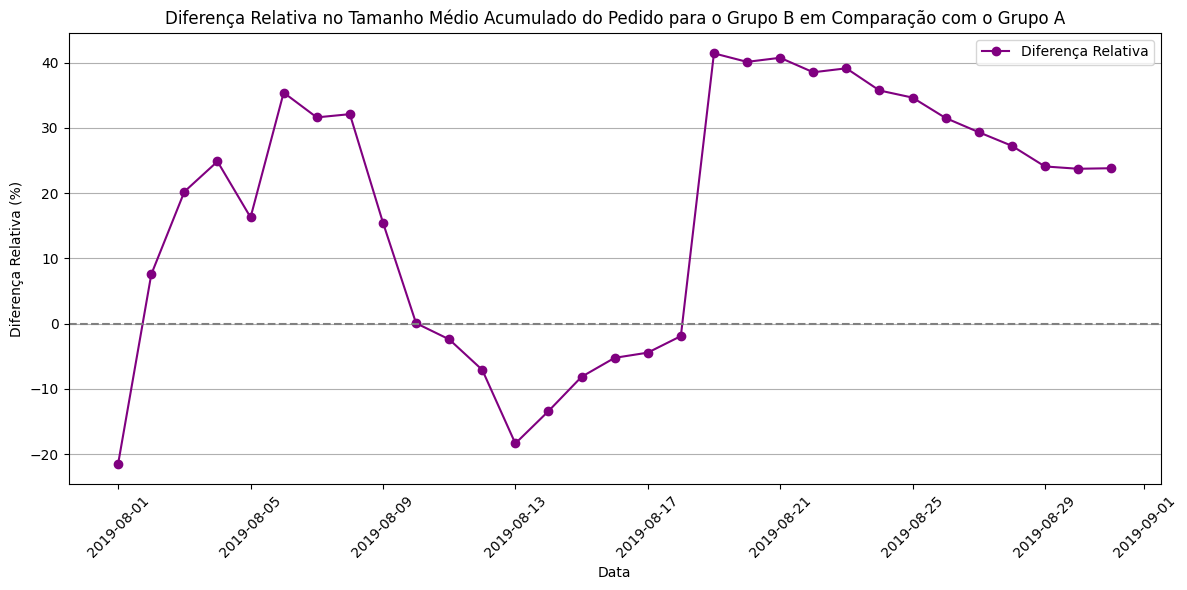

In [132]:

# Calcular o número de itens por pedido usando 'transaction_id'
orders['num_items'] = orders.groupby('transaction_id')['transaction_id'].transform('count')

# Calcular o tamanho médio do pedido por data e grupo
orders['order_size'] = orders['revenue'] / orders['num_items']

# Calcular o tamanho médio acumulado do pedido por data e grupo
orders['group'] = orders['group'].astype(object)
cumulative_average_order_size = orders.groupby(['group', 'date'])['order_size'].mean().groupby(level=0).cumsum().reset_index()

# Pivotar os dados para ter uma coluna para cada grupo
cumulative_average_order_size_pivot = cumulative_average_order_size.pivot(index='date', columns='group', values='order_size').fillna(0)

# Resetar o índice para garantir que `group` e `date` não sejam tratados como categorias
cumulative_average_order_size_pivot = cumulative_average_order_size_pivot.reset_index()

# Calcular a diferença relativa no tamanho médio acumulado do pedido para o grupo B em comparação com o grupo A
cumulative_average_order_size_pivot['relative_difference'] = (
    (cumulative_average_order_size_pivot['B'] - cumulative_average_order_size_pivot['A']) /
    cumulative_average_order_size_pivot['A']
) * 100  # Multiplicando por 100 para obter a diferença em percentual

# Configurar o índice de volta para 'date' para fins de plotagem
cumulative_average_order_size_pivot.set_index('date', inplace=True)

print(cumulative_average_order_size_pivot)

# Fazer o gráfico da diferença relativa no tamanho médio acumulado do pedido
plt.figure(figsize=(12, 6))
plt.plot(cumulative_average_order_size_pivot.index, cumulative_average_order_size_pivot['relative_difference'], color='purple', marker='o', label="Diferença Relativa")
plt.title('Diferença Relativa no Tamanho Médio Acumulado do Pedido para o Grupo B em Comparação com o Grupo A')
plt.xlabel('Data')
plt.ylabel('Diferença Relativa (%)')
plt.axhline(0, color='gray', linestyle='--')  # Linha horizontal em 0
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Cálculo de taxa de conversão

         date group  orders  visits  conversion_rate
0  2019-08-01     A      24     719         3.337969
1  2019-08-01     B      21     713         2.945302
2  2019-08-02     A      20     619         3.231018
3  2019-08-02     B      24     581         4.130809
4  2019-08-03     A      24     507         4.733728
..        ...   ...     ...     ...              ...
57 2019-08-29     B      20     531         3.766478
58 2019-08-30     A      11     490         2.244898
59 2019-08-30     B      24     490         4.897959
60 2019-08-31     A      12     699         1.716738
61 2019-08-31     B      20     718         2.785515

[62 rows x 5 columns]


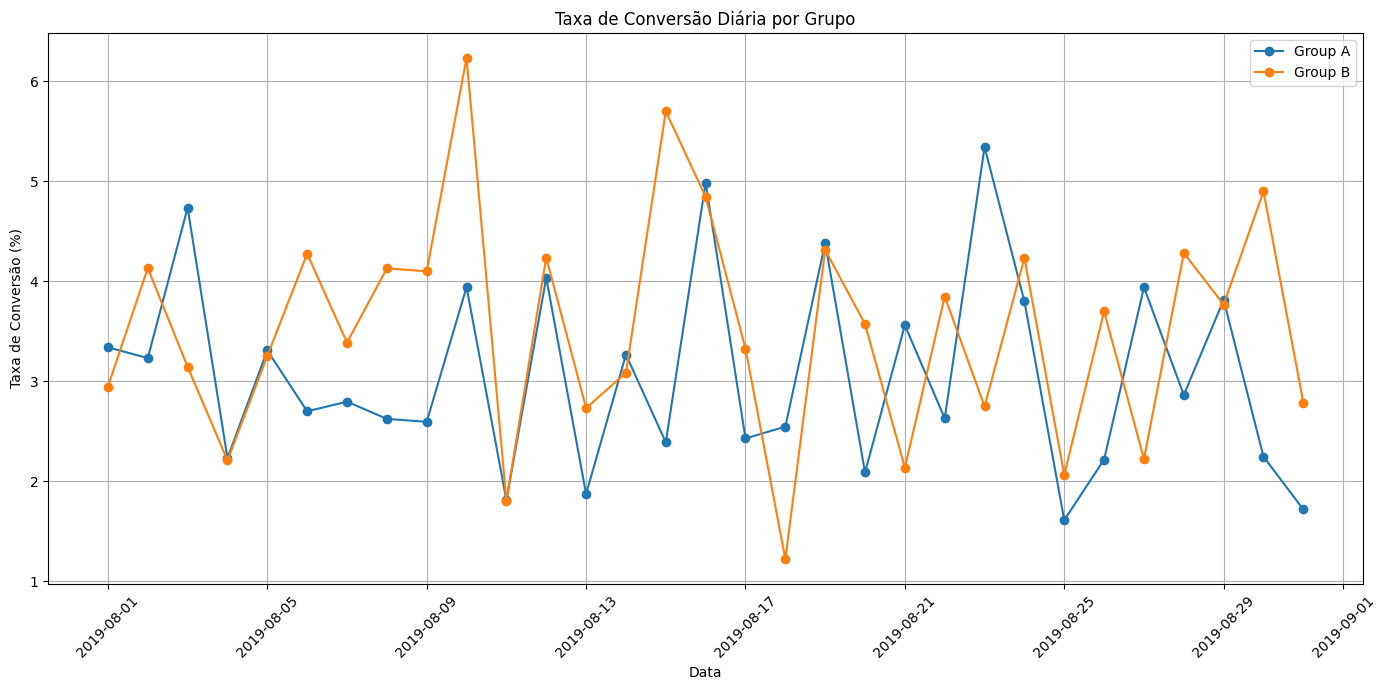

In [133]:
# Agrupar os pedidos por data e grupo
orders_grouped = orders.groupby(['date', 'group']).size().reset_index(name='orders')

# Agrupar as visitas por data e grupo
visits_grouped = visits.groupby(['date', 'group'])['visits'].sum().reset_index()

# Unir os dois DataFrames
merged_data = pd.merge(orders_grouped, visits_grouped, on=['date', 'group'])

# Calcular a taxa de conversão
merged_data['conversion_rate'] = (merged_data['orders'] / merged_data['visits']) * 100

print(merged_data)

# Traçar as taxas de conversão
plt.figure(figsize=(14, 7))
for group in merged_data['group'].unique():
    plt.plot(merged_data[merged_data['group'] == group]['date'], 
             merged_data[merged_data['group'] == group]['conversion_rate'], 
             marker='o', label=f'Group {group}')

plt.title('Taxa de Conversão Diária por Grupo')
plt.xlabel('Data')
plt.ylabel('Taxa de Conversão (%)')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

No ínicio de agosto, a taxa de conversão entre um grupo e outro não mostra tanta variação, tendo similaridades entre ambos. Mas no fim do mês, o grupo B está liderando a taxa de conversão. Em um contexto geral, o número de pedidos feitos é muito menor do que o número de visitas que o site recebe, ou seja, há algo que deve ser melhorado com a intenção de aumentar a clientela. De qualquer maneira, a estratégia do grupo B parece ser mais eficaz do que a do grupo A.

[-11.76367461   7.7199621   -9.58341447  -8.17862274  -6.89152699
   2.12668176   4.5022437   10.0612309   14.57744963  20.03186462
  18.9201506   17.41744173  18.77729411  16.90473374  23.3829331
  20.75604497  21.5106022   18.09729184  16.63879369  18.49430457
  15.27964751  16.4911158   11.71821667  11.70560877  12.04188058
  13.55265116  10.886623    12.15644134  11.59650724  14.16105479
  15.03002376]


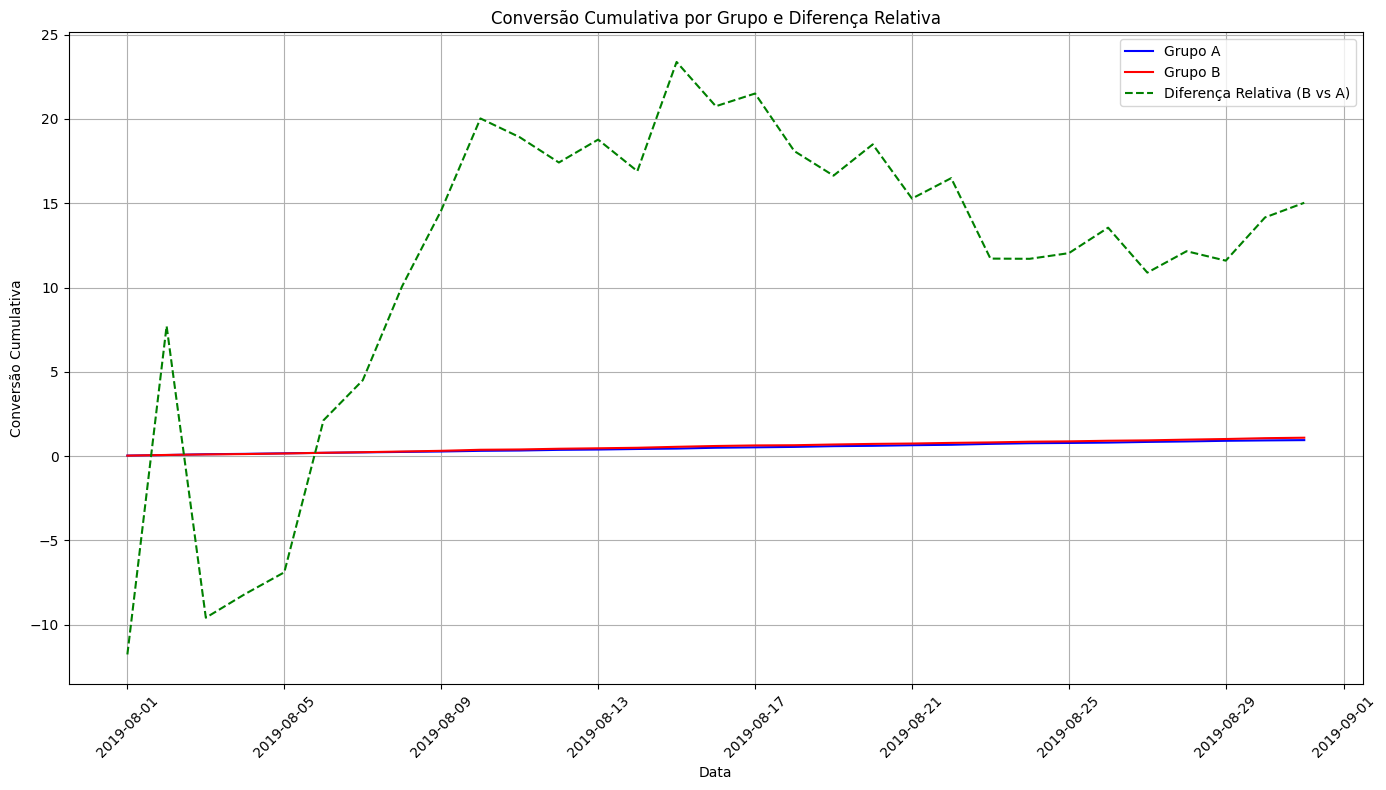

In [134]:
# Cálculo da taxa de conversão cumulativa por grupo
orders_by_date_group = orders.groupby(['date', 'group']).agg({'transaction_id': 'count'}).rename(columns={'transaction_id': 'orders'})
visits_by_date_group = visits.groupby(['date', 'group']).agg({'visits': 'sum'})

# Juntando as duas tabelas
cumulative_data = orders_by_date_group.join(visits_by_date_group).reset_index()

# Criando coluna de taxa de conversão
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visits']

# Separando os dados por grupo e calculando a conversão cumulativa para cada data
cumulative_data_A = cumulative_data[cumulative_data['group'] == 'A'].sort_values(by='date').copy()
cumulative_data_B = cumulative_data[cumulative_data['group'] == 'B'].sort_values(by='date').copy()

cumulative_data_A['cumulative_conversion'] = cumulative_data_A['conversion'].cumsum()
cumulative_data_B['cumulative_conversion'] = cumulative_data_B['conversion'].cumsum()

# Calculando a diferença relativa entre as conversões cumulativas dos grupos B e A
relative_difference = ((cumulative_data_B['cumulative_conversion'].values - 
                        cumulative_data_A['cumulative_conversion'].values) / 
                        cumulative_data_A['cumulative_conversion'].values) * 100

print(relative_difference)

# Plotando os gráficos
plt.figure(figsize=(14, 8))

# Conversões cumulativas para o grupo A e B
plt.plot(cumulative_data_A['date'], cumulative_data_A['cumulative_conversion'], label='Grupo A', color='blue')
plt.plot(cumulative_data_B['date'], cumulative_data_B['cumulative_conversion'], label='Grupo B', color='red')


# Diferença relativa entre os grupos
plt.plot(cumulative_data_A['date'], relative_difference, label='Diferença Relativa (B vs A)', color='green', linestyle='--')

# Configurações do gráfico
plt.xlabel('Data')
plt.ylabel('Conversão Cumulativa')
plt.title('Conversão Cumulativa por Grupo e Diferença Relativa')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Aparentemente os valores estão negativos para mostrar que em determinadas datas, o grupo B apresentou desempenho inferior ao grupo A. No gráfico, a flutuação da linha relativa sugere que precisa de mais testes.

In [135]:
orders_per_visitor = orders.groupby('visitor_id')['transaction_id'].count().reset_index()
orders_per_visitor.columns = ['visitor_id', 'orders_count']

# Calcular percentis 95 e 99
percentile_95 = orders_per_visitor['orders_count'].quantile(0.95)
percentile_99 = orders_per_visitor['orders_count'].quantile(0.99)

print(f'Percentil 95: {percentile_95}')
print(f'Percentil 99: {percentile_99}')


Percentil 95: 2.0
Percentil 99: 4.0


O percentil 99 pode indicar uma anomalia, já que são visitantes fazendo mais de 4 pedidos. Pode se tratar de clientes leais ou boas estratégias de marketing.

In [136]:
revenue_percentile_95 = orders['revenue'].quantile(0.95)
revenue_percentile_99 = orders['revenue'].quantile(0.99)

print(f'Percentil 95 da Receita: {revenue_percentile_95}')
print(f'Percentil 99 da Receita: {revenue_percentile_99}')


Percentil 95 da Receita: 435.54
Percentil 99 da Receita: 900.9039999999999


O percentil de 99 da receita indica que apenas 1% de receita está acima do valor citado, podendo indicar uma anomalia

In [137]:
from scipy import stats
# significância estatística da diferença na conversão entre os grupos usando os dados brutos.  
# Criar tabela de contingência
contingency_table = pd.crosstab(orders['group'], orders['visitor_id'].isin(orders['visitor_id']))

# Teste qui-quadrado
chi2, p, _, _ = stats.chi2_contingency(contingency_table)
print(f'Valor de p: {p}')

Valor de p: 1.0


 Isso sugere que a variação do teste A/B não teve efeito notável sobre a taxa de conversão. A variação testada pode não ter sido suficientemente diferente ou atrativa para impactar o comportamento dos usuários.

In [138]:
 # significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados brutos.
mean_revenue_a = orders[orders['group'] == 'A']['revenue'].mean()
mean_revenue_b = orders[orders['group'] == 'B']['revenue'].mean()

t_stat, p_value = stats.ttest_ind(
    orders[orders['group'] == 'A']['revenue'],
    orders[orders['group'] == 'B']['revenue'],
    equal_var=False
)

print(f'Tamanho médio do grupo A: {mean_revenue_a}')
print(f'Tamanho médio do grupo B: {mean_revenue_b}')
print(f'Valor de p para o teste t: {p_value}')

Tamanho médio do grupo A: 115.89748653500898
Tamanho médio do grupo B: 145.06343750000002
Valor de p para o teste t: 0.3745072295652421


A diferença no tamanho médio dos pedidos entre os grupos A e B não é estatisticamente significativa. Isso sugere que a variação testada não resultou em um aumento confiável no tamanho médio dos pedidos em comparação com o grupo de controle.A variação aplicada ao grupo B pode não ter sido suficientemente impactante para aumentar o valor médio do pedido de forma significativa.

In [140]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest

# Calculando o número de pedidos por visitante
orders_per_visitor = orders.groupby('visitor_id')['transaction_id'].count().reset_index()
orders_per_visitor.columns = ['visitor_id', 'orders_count']

# Calcular percentis 95 e 99
percentile_95 = orders_per_visitor['orders_count'].quantile(0.95)
percentile_99 = orders_per_visitor['orders_count'].quantile(0.99)

# Filtrando os dados para remover usuários com um número excessivo de pedidos (percentil 95 ou 99)
orders_filtered = orders_per_visitor[orders_per_visitor['orders_count'] <= percentile_99]  # ou percentile_95

# Recalculando as conversões e visitas para cada grupo
A_conversions_filtered = orders_filtered[orders_filtered['visitor_id'].isin(orders[orders['group'] == 'A']['visitor_id'])].shape[0]
B_conversions_filtered = orders_filtered[orders_filtered['visitor_id'].isin(orders[orders['group'] == 'B']['visitor_id'])].shape[0]
A_visits_filtered = visits[visits['group'] == 'A']['visits'].sum()
B_visits_filtered = visits[visits['group'] == 'B']['visits'].sum()

# Aplicando o teste de proporções aos dados filtrados
z_score_filtered, p_value_filtered = proportions_ztest([A_conversions_filtered, B_conversions_filtered], 
                                                       [A_visits_filtered, B_visits_filtered])

print(f"Z-score (filtrado): {z_score_filtered}")
print(f"P-valor (filtrado): {p_value_filtered}")

Z-score (filtrado): -2.4168487558326905
P-valor (filtrado): 0.015655520637817673


O grupo B apresenta uma taxa de conversão inferior à do grupo A.

In [141]:
# Filtrando os dados para remover usuários com um número excessivo de pedidos
orders_per_visitor = orders.groupby('visitor_id')['transaction_id'].count().reset_index()
orders_per_visitor.columns = ['visitor_id', 'orders_count']
percentile_95 = orders_per_visitor['orders_count'].quantile(0.95)

# Filtrar os pedidos para manter apenas aqueles cujo número de pedidos está abaixo do percentil 95
filtered_orders = orders_per_visitor[orders_per_visitor['orders_count'] <= percentile_95]

# Calcular o tamanho médio do pedido para cada grupo
grouped_orders = orders.groupby('group')['revenue'].mean().reset_index()

# Extraindo os dados para cada grupo
group_A_orders = orders[orders['group'] == 'A']['revenue']
group_B_orders = orders[orders['group'] == 'B']['revenue']

# Realizar o teste t
t_statistic, p_value = stats.ttest_ind(group_A_orders, group_B_orders)

# Resultados
mean_A = group_A_orders.mean()
mean_B = group_B_orders.mean()

print(f'Tamanho médio do grupo A: {mean_A}')
print(f'Tamanho médio do grupo B: {mean_B}')
print(f'Estatística t: {t_statistic}')
print(f'Valor de p: {p_value}')

Tamanho médio do grupo A: 115.89748653500898
Tamanho médio do grupo B: 145.06343750000002
Estatística t: -0.8345854854522999
Valor de p: 0.4041179448526676


Os dados atuais não suportam a conclusão de que há uma diferença significativa entre os tamanhos dos pedidos dos grupos A e B

# 1.6 Decisão

Antes de testar estatisticamente, os resultados estavam mostrando em grande parte que o grupo B era mais bem sucedido que o grupo A, mas a partir da flutuação de linha do gráfico de conversão cumulativa por grupo e diferença relativa, foi possível observar que essa discrepância deveria ser analisada mais de perto. Ao fazer os testes estatísticos, ficou claro que não há uma diferença significativa entre os grupos de acordo com os dados apresentados, podendo indicar que as hipóteses precisam ser ajustadas a fim de se tornarem mais relevantes e impactantes.   